In [1]:
# Imports
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
from okmesopy import MesonetExtractor
from shapefile import Reader

In [2]:
# create a new MesonetExtractor object
# use the Jupyter working directory as the destination
# verbose is an optional argument that is false by default, setting it true enables verbose logging
destination = os.getcwd()
extractor = MesonetExtractor(destination, verbose = True)

In [3]:
# all download calls need a start and end date in python datetime format
start_date = date(2021, 2, 1)
end_date = date(2021, 2, 10)

(array([18659., 18660., 18661., 18662., 18663., 18664., 18665., 18666.,
        18667., 18668., 18669.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

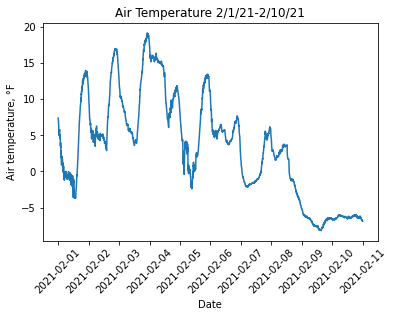

In [4]:
# the download_station_data() method downloads data for a single station over specified time period
# stations must be specified using the station ID found in the stid column of the metadata file
# for this method, station ID is case insensitive
acme_data = extractor.download_station_data('acme',start_date,end_date)
plt.plot(acme_data['date_time'],acme_data['TAIR'])
plt.title('Air Temperature 2/1/21-2/10/21')
plt.xlabel('Date')
plt.ylabel('Air temperature, °F')
plt.xticks(rotation = 45)

In [5]:
# if an invalid station ID is provided, an error will be returned along with a list of all valid IDs
invalid = extractor.download_station_data('fake',start_date,end_date)

Error: invalid site ID. Valid site IDs are:
ADAX ALTU ALV2 ALVA ANT2 ANTL APAC ARD2 ARDM ARNE BBOW BEAV BEEX BESS BIXB BLAC BOIS BOWL BREC BRIS BROK BUFF BURB BURN BUTL BYAR CALV CAMA CARL CATO CENT CHAN CHER CHEY CHIC CLAR CLAY CLOU CLRM COOK COPA DURA ELKC ELRE ERIC EUFA EVAX FAIR FITT FORA FREE FTCB GOOD GRA2 GRAN GUTH HASK HECT HINT HOBA HOLD HOLL HOOK HUGO IDAB INOL JAYX KENT KETC KIN2 KING LAHO LANE MADI MANG MARE MARS MAYR MCAL MEDF MEDI MIAM MINC MRSH MTHE NEWK NEWP NINN NORM NOWA NRMN OILT OKCE OKCN OKCW OKEM OKMU PAUL PAWN PERK PORT PRES PRYO PUTN REDR RETR RING SALL SEIL SEMI SHAW SKIA SLAP SPEN STIG STIL STUA SULP TAHL TALA TALI TIPT TISH TULL TULN VALL VANO VINI WAL2 WALT WASH WATO WAUR WEAT WEB3 WEBB WEBR WEST WILB WIST WOOD WYNO YUKO


(array([18659., 18660., 18661., 18662., 18663., 18664., 18665., 18666.,
        18667., 18668., 18669.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

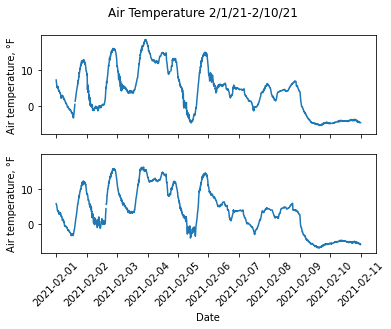

In [6]:
# data can also be downloaded for all the stations within a bounding box
# the bounding box is a list in the format [low longitude, low latitude, high longitude, high latitude]
# this is the same format as that used by the pyshp library
bbox = [-96.5,34,-96,35]
# note: the CALV station has no data during this time period.
# we change the verbose parameter to false to avoid a bunch of warnings.
extractor.verbose = False
bbox_data = extractor.download_bounding_box(bbox,start_date,end_date)
fig, axs = plt.subplots(2, sharex=True, sharey=True)
fig.suptitle('Air Temperature 2/1/21-2/10/21')
cent_data = bbox_data.loc[bbox_data['STID'] == 'CENT']
stua_data = bbox_data.loc[bbox_data['STID'] == 'STUA']
axs[0].plot(cent_data['date_time'],cent_data['TAIR'])
axs[1].plot(stua_data['date_time'],stua_data['TAIR'])
for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='Air temperature, °F')
    ax.label_outer()
plt.xticks(rotation = 45)

In [7]:
# the download_shape_file() reads a shape file from the path given in the shape_path argument
# data for all the stations within the shape's bounding box are downloaded
# a warning will be given if the coordinates appear to be in the wrong format
extractor.verbose = True # turn verbose logging back on
shape_data = extractor.download_shape_file('{}/shapefiles/grand_lake_watershed/grand_lake_watershed.shp'.format(destination),start_date,end_date)

It appears that the bounding box [-123028.0390625, 1478977.375, 213226.515625, 1760277.875] is not in latitude longitude coordinates. Try specifing the prj_path argument when calling this function.


In [8]:
# if the optional prj_path argument is specified, the method will read the .prj file and automatically convert
# the coordinates to EPSG:4269 which is the CRS used by Mesonet
shape_data = extractor.download_shape_file('{}/shapefiles/grand_lake_watershed/grand_lake_watershed.shp'.format(destination),start_date,end_date,prj_path='{}/shapefiles/grand_lake_watershed/grand_lake_watershed.prj'.format(destination))
num_stations = len(shape_data['STID'].unique())
stids = ' '.join(shape_data['STID'].unique())
print('Downloaded data for {} stations within the shape file: {}'.format(num_stations,stids))
print(shape_data)

Transforming bounding box from EPSG:5069 to EPSG:4269.
Downloaded data for 15 stations within the shape file: BLAC BURB COPA FORA JAYX MIAM NEWK NOWA PAWN PRYO REDR SKIA TALA VINI WYNO
       STID  STNM  TIME  RELH  TAIR  WSPD  WVEC   WDIR  WDSD  WSSD  ...  TS10  \
0      BLAC    11     0    79   2.1   3.3   3.3    2.0   6.7   0.3  ...   6.7   
1      BLAC    11     5    81   1.9   3.6   3.5    3.0   6.3   0.4  ...   NaN   
2      BLAC    11    10    82   1.8   3.8   3.7    2.0  13.2   0.5  ...   NaN   
3      BLAC    11    15    82   1.8   3.8   3.7  360.0  12.1   0.5  ...   6.7   
4      BLAC    11    20    82   1.7   3.7   3.7  355.0   9.3   0.6  ...   NaN   
...     ...   ...   ...   ...   ...   ...   ...    ...   ...   ...  ...   ...   
43195  WYNO   108  1415    86  -8.1   NaN   NaN    NaN   NaN   NaN  ...   NaN   
43196  WYNO   108  1420    85  -8.1   NaN   NaN    NaN   NaN   NaN  ...   NaN   
43197  WYNO   108  1425    85  -8.2   NaN   NaN    NaN   NaN   NaN  ...   0.9   
43198

In [9]:
# the download_shape_object() method accepts a pyshp Reader or Shape object as an input and downloads data
# for all the stations within the object's bounding box
# if no stations are found within the bounding box and verbose logging you will get a message suggesting
# you set the padding argument
shp_path = '{}/shapefiles/horse_creek/horse_creek.shp'.format(destination)
sf = Reader(shp_path)
obj_data = extractor.download_shape_object(sf,start_date,end_date)

No stations found within the bounding box.
[-94.99976083200346, 36.634247035429745, -94.83198491219673, 36.78026945461582]
Try increasing the padding argument.


(array([18659., 18660., 18661., 18662., 18663., 18664., 18665., 18666.,
        18667., 18668., 18669.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

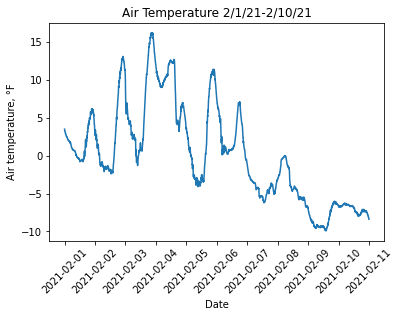

In [10]:
# the padding argument increases or decreases the size of the bounding box; it must be positive or it will be ignored
# the length of the each side of the box is multiplied by the padding argument
# the box's size is increased equally in each direction, i.e. the center of the bounding box remains unchanged
# padding can be set for the download_shape_file, download_shape_object, and download_bounding_box methods
obj_data = extractor.download_shape_object(sf,start_date,end_date,padding=2)
sf.close()
plt.plot(obj_data['date_time'],obj_data['TAIR'])
plt.title('Air Temperature 2/1/21-2/10/21')
plt.xlabel('Date')
plt.ylabel('Air temperature, °F')
plt.xticks(rotation = 45)